In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

#root_path = './gdrive/MyDrive/DB_LARC/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

In [4]:
from keras.applications import ResNet50

img_rows = 250
img_cols = 250

ResNet50 = ResNet50 = ResNet50(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

for layer in ResNet50.layers:
  layer.trainable = False




94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
num_classes = 71


inp = ResNet50.output
inp = GlobalAveragePooling2D()(inp)


dense1 = Dense(512, activation= 'relu')(inp)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation= 'relu')(dense1)
dense2 = Dropout(0.1)(dense2)

out = Dense(num_classes, activation = 'softmax')(dense2)

model = Model(ResNet50.input, out)
model.compile(optimizer = Nadam(lr = 0.0001) ,loss = 'categorical_crossentropy', metrics=['accuracy'])


In [6]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 125, 125, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 125, 125, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
# Generating new images for the same object




from keras.preprocessing.image import ImageDataGenerator

train_data_dir = './gdrive/Shareddrives/DB-LARC/imagens-tratadas/adolescente/arabes'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.25)

#validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 18
val_batchsize = 20

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
        subset='validation')

Found 71 images belonging to 71 classes.
Found 0 images belonging to 71 classes.


In [9]:
 #importing our optimizer

from keras.optimizers import RMSprop

A = model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [ ]:
# Treino e save

epochs = 60
batch_size = 20

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size)

model.save('./gdrive/Shareddrives/DB-LARC/Modelos/imagenstratadas_adolescentesArabes_ResNet50.h5')

Epoch 1/60


KeyboardInterrupt: ignored

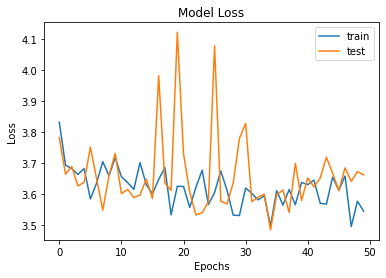

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

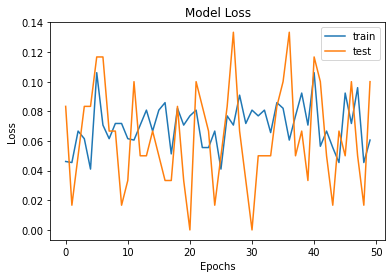

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()